# **1. Perkenalan Dataset**


**Sumber Dataset**:  
https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data  
  Dataset ini adalah dataset publik dari Kaggle untuk menganalisis dan memprediksi risiko penyakit jantung pada seseorang berdasarkan faktor demografi, indikator klinis, gaya hidup, dan riwayat keluarga


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('heart_disease.csv')
print(f"Ukuran dataset: {df.shape}")
df.head()

Ukuran dataset: (10000, 21)


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Su

In [4]:
print("Statistik Deskriptif")
df.describe()

Statistik Deskriptif


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [5]:
print("Total missing values :")
df.isnull().sum()

Total missing values :


,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [6]:
print("Total data duplicate :")
df.duplicated().sum()

Total data duplicate :


np.int64(0)

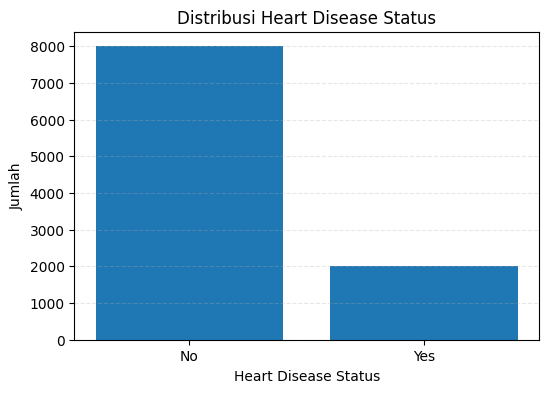

In [7]:
# Distribusi Heart Disease Status
counts = df["Heart Disease Status"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Heart Disease Status")
plt.ylabel("Jumlah")
plt.title("Distribusi Heart Disease Status")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Drop kolom Alcohol Consumption
df = df.drop(columns=["Alcohol Consumption"])

# Hapus missing value di kolom lainnya
df = df.dropna().reset_index(drop=True)

df.isna().sum()


,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [9]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    df.shape()
duplicates

np.int64(0)

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
outlier_report = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_report[col] = len(outliers)
print("\nJumlah outlier per kolom:")
print(outlier_report)


Jumlah outlier per kolom:
{'Age': 0, 'Blood Pressure': 0, 'Cholesterol Level': 0, 'BMI': 0, 'Sleep Hours': 0, 'Triglyceride Level': 0, 'Fasting Blood Sugar': 0, 'CRP Level': 0, 'Homocysteine Level': 0}


In [11]:
bins = [18, 34, 49, 64, 80]
labels = ["young_adult", "adult", "middle_aged", "senior"]

df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)
df["age_group"].value_counts()


,count
age_group,
young_adult,2514
senior,2489
adult,2288
middle_aged,2241


In [12]:
# Split Data
X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Encoding Age Group
if "age_group" in X_train.columns:
    X_train = pd.get_dummies(X_train, columns=["age_group"], drop_first=True)
    X_test  = pd.get_dummies(X_test, columns=["age_group"], drop_first=True)

    X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Mendeteksi kolom boolean
bool_like_cols = []

for col in X_train.columns:
    unique_vals = set(X_train[col].dropna().astype(str).str.lower().str.strip())
    if unique_vals.issubset({"true", "false"}) or unique_vals.issubset({"yes", "no"}):
        bool_like_cols.append(col)

# Encoding kolom boolean
bool_map = {"true": 1, "false": 0, "yes": 1, "no": 0}

for col in bool_like_cols:
    X_train[col] = (
        X_train[col].astype(str).str.lower().str.strip().map(bool_map).astype(int)
    )
    X_test[col] = (
        X_test[col].astype(str).str.lower().str.strip().map(bool_map).astype(int)
    )

# Encoding Gender
if "Gender" in X_train.columns:
    gender_map = {"male": 1, "female": 0}
    X_train["Gender"] = (
        X_train["Gender"].astype(str).str.lower().str.strip().map(gender_map).astype(int)
    )
    X_test["Gender"] = (
        X_test["Gender"].astype(str).str.lower().str.strip().map(gender_map).astype(int)
    )

# Mendeteksi ordinal low/medium/high
ordinal_cols = []

for col in X_train.columns:
    unique_vals = set(X_train[col].dropna().astype(str).str.lower().str.strip())
    if unique_vals.issubset({"low", "medium", "high"}):
        ordinal_cols.append(col)

# Encoding ordinal
ordinal_map = {"low": 0, "medium": 1, "high": 2}

for col in ordinal_cols:
    X_train[col] = (
        X_train[col].astype(str).str.lower().str.strip().map(ordinal_map).astype(int)
    )
    X_test[col] = (
        X_test[col].astype(str).str.lower().str.strip().map(ordinal_map).astype(int)
    )

print("Encoded boolean-like:", bool_like_cols)
print("Encoded ordinal (low/medium/high):", ordinal_cols)
if "Gender" in X_train.columns:
    print("Encoded Gender berhasil.")

Encoded boolean-like: ['Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'age_group_adult', 'age_group_middle_aged', 'age_group_senior']
Encoded ordinal (low/medium/high): ['Exercise Habits', 'Stress Level', 'Sugar Consumption']
Encoded Gender berhasil.


In [14]:
X_train.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,age_group_adult,age_group_middle_aged,age_group_senior
221,79.0,1,167.0,213.0,1,1,0,1,30.232050,0,...,0,4.783926,1,112.0,106.0,6.494391,7.421825,0,0,1
8754,53.0,0,157.0,153.0,1,1,0,0,38.634446,0,...,2,6.411844,0,161.0,82.0,7.026435,19.455857,0,1,0
3290,70.0,0,154.0,204.0,2,1,0,0,25.329635,0,...,0,6.153588,2,206.0,130.0,2.534693,13.211738,0,0,1
8745,40.0,1,149.0,293.0,1,0,0,1,39.222403,0,...,0,8.729142,1,150.0,108.0,1.206099,9.837712,1,0,0
1805,22.0,0,146.0,175.0,0,0,1,1,24.861534,0,...,1,7.837184,1,202.0,127.0,11.685557,13.825225,0,0,0


In [15]:
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# scaling hanya kolom numerik
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [16]:
X_train_scaled.head()


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,age_group_adult,age_group_middle_aged,age_group_senior
221,1.629576,0.998820,0.988117,-0.286820,-0.007556,0.976794,-1.001444,1.011476,0.179556,-0.99542,...,-1.225909,-1.263295,0.010729,-1.591391,-0.601946,-0.230708,-1.164620,-0.559931,-0.558921,1.683325
8754,0.201021,-1.001181,0.419003,-1.662106,-0.007556,0.976794,-1.001444,-0.988655,1.514536,-0.99542,...,1.241767,-0.333540,-1.210289,-1.027815,-1.614921,-0.108195,1.625631,-0.559931,1.789162,-0.594062
3290,1.135076,-1.001181,0.248268,-0.493113,1.218229,0.976794,-1.001444,-0.988655,-0.599344,-0.99542,...,-1.225909,-0.481038,1.231747,-0.510246,0.411030,-1.142496,0.177849,-0.559931,-0.558921,1.683325
8745,-0.513256,0.998820,-0.036289,1.546894,-0.007556,-1.023758,-1.001444,1.011476,1.607951,-0.99542,...,-1.225909,0.989942,0.010729,-1.154332,-0.517531,-1.448427,-0.604465,1.785934,-0.558921,-0.594062
1805,-1.502256,-1.001181,-0.207023,-1.157834,-1.233341,-1.023758,0.998558,1.011476,-0.673717,-0.99542,...,0.007929,0.480517,0.010729,-0.556252,0.284408,0.964647,0.320094,-0.559931,-0.558921,-0.594062


In [17]:
smote = SMOTE(random_state=42)

X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train)

print("Sebelum SMOTE:", y_train.value_counts())
print("Sesudah SMOTE:", y_train_final.value_counts())

Sebelum SMOTE: Heart Disease Status
No     6096
Yes    1529
Name: count, dtype: int64
Sesudah SMOTE: Heart Disease Status
No     6096
Yes    6096
Name: count, dtype: int64


In [18]:
# Simpan ke CSV
X_train_final.to_csv("X_train_preprocessed.csv", index=False)
y_train_final.to_csv("y_train_preprocessed.csv", index=False)

X_test_scaled.to_csv("X_test_preprocessed.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
